# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reihan Aulia Darojat
- **Email:** reihanauliadarojat@gmail.com
- **ID Dicoding:** shmashiro

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana pengaruh kondisi suhu, kelembapan dan kecepa terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat data day.csv

In [8]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight: diketahui dari sumber penyedia data bahwa**
- instant: Indeks record.
- dteday: Tanggal.
- season: Musim (1: semi, 2: panas, 3: gugur, 4: dingin).
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan (1 hingga 12).
- holiday: Apakah hari tersebut adalah hari libur (1: ya, 0: tidak).
- weekday: Hari dalam seminggu.
- workingday: Hari kerja (1: ya, 0: tidak).
- weathersit: Kondisi cuaca:
- 1: Cerah, beberapa awan.
- 2: Kabut + Berawan.
- 3: Salju ringan, hujan ringan.
- 4: Hujan deras + Salju + Kabut.
- temp: Suhu terstandardisasi dalam Celsius. Suhu yang dinormalisasi dalam Celsius. Nilai dibagi dengan 41 (maksimum).
- atemp: Suhu terasa terstandardisasi dalam Celsius. Suhu perasaan yang dinormalisasi dalam Celsius. Nilai dibagi dengan 50 (maksimum).
- hum: Kelembapan terstandardisasi.
- windspeed: Kecepatan angin terstandardisasi.
- casual: Jumlah pengguna kasual.
- registered: Jumlah pengguna terdaftar.
- cnt: Total sewa sepeda (kasual + terdaftar).

#### Memuat data hour.csv

In [12]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight: Sedikit Penambahan**
- hr adalah Hour/jam
- **temp**: Suhu yang dinormalisasi dalam Celsius. Nilai dihitung menggunakan rumus \((t - t_{\text{min}}) / (t_{\text{max}} - t_{\text{min}})\), dengan \(t_{\text{min}} = -8\) dan \(t_{\text{max}} = +39\) (hanya dalam skala per jam).
- **atemp**: Suhu perasaan yang dinormalisasi dalam Celsius. Nilai dihitung menggunakan rumus \((t - t_{\text{min}}) / (t_{\text{max}} - t_{\text{min}})\), dengan \(t_{\text{min}} = -16\) dan \(t_{\text{max}} = +50\) (hanya dalam skala per jam).


### Assessing Data

Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data

#### Menilai Data day_df
Data pertama yang akan kita nilai adalah day_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

- terdapat kesalahan pada kolom dteday tipe data object yang harusnya direpresentasikan sebagai tipe data datetime
- Pada data ini tidak ditemukan perbedaan data pada tiap kolom sehingga tiap kolom tidak memiliki missing value.

In [20]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**insight:**

Tidak ditemukan duplikat dalam data ini

#### Menilai Data hour_df
Data pertama yang akan kita nilai adalah hour_df. sama seperti sebelumnya, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

- terdapat kesalahan pada kolom dteday tipe data object yang harusnya direpresentasikan sebagai tipe data datetime
- Pada data ini tidak ditemukan perbedaan data pada tiap kolom sehingga tiap kolom tidak memiliki missing value.

### Cleaning Data

Sekarang kita akan melakukan cleaning data dengan permasalahan yang telah ditemukan, yaitu kolom dtday tipe data **object** pada data **day_df** dan **hour_df**. kita akan melakukan penggantian dari tipe data **object** menjadi **datetime**

#### Cleaning day_df kolom dtday dari tipe data "object" ke "datetime"

In [29]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Memeriksa kembali informasi dteday

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

***insight :***
- dari info() terlihat bahwa dteday berhasil di ubah menjadi tipedata **datetime**

#### Cleaning day_df kolom dtday dari tipe data "object" ke "datetime"

In [36]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Memeriksa kembali informasi dteday pada tabel hour_df

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

***insight :***
- dari info() terlihat bahwa dteday berhasil di ubah menjadi tipedata **datetime**

## Exploratory Data Analysis (EDA)

### Explore data day_df
Pertama, mencari data yang akan digunakan untuk keperluan menemukan jawaban dari pertanyaan yang sudah di sebutkan di atas.

pertama, lakukan menggunakan method describe() untuk melihat seluruh data yang ada

In [44]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


##### Melihat distribusi kondisi cuaca

Kita akan berfokus pada kolom weathersit, temp, hum, windspeed, dan cnt menggunakan fungsi `value_counts()` untuk mengetahui pengaruh cuaca terhadap penyewaan

In [48]:
print(day_df['weathersit'].value_counts())

weathersit
1    463
2    247
3     21
Name: count, dtype: int64


***insight :***
dari sini kita dapat melihat dengan kondisi 
1: Cerah, 
2: Mendung, 
3: Hujan, 
4: Hujan deras

maka penyewaan sepeda sangat dipengaruhi oleh cuaca dimana cuaca **cerah** menempati posisi tertinggi dalam penyewaan sepeda disusul dengan **mendung** dan **hujan**, dan juga pada saat **hujan deras** tidak ada orang yang menyewa sepeda

##### Melihat Rata-rata penyewaan sepeda berdasarkan kondisi cuaca

In [52]:
avg_rentals_by_weather = day_df.groupby('weathersit')['cnt'].mean()
print(avg_rentals_by_weather)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


***insight :***

Data tersebut menunjukkan rata-rata jumlah sewa `(cnt)` berdasarkan kategori cuaca `(weathersit)`. 
**cuaca cerah** memiliki jumlah sewa tertinggi. 
diikuti oleh **cuaca mendung** dan **cuaca hujan**. 

yang menunjukkan bahwa cuaca yang lebih baik cenderung mendorong lebih banyak penyewaan

##### Membuat fungsi Rata-rata penyewaan sepeda berdasarkan suhu, kelembaban, dan kecepatan angin

In [56]:
avg_rentals_by_temp = day_df.groupby('temp')['cnt'].mean().nlargest(10)
avg_rentals_by_humidity = day_df.groupby('hum')['cnt'].mean().nlargest(10)
avg_rentals_by_windspeed = day_df.groupby('windspeed')['cnt'].mean().nlargest(10)

print("rata rata penyewaan sepeda berdasarkan suhu            :", avg_rentals_by_temp)
print("rata rata penyewaan sepeda berdasarkan kelembapan      :", avg_rentals_by_humidity)
print("rata rata penyewaan sepeda berdasarkan kecepatan angin :", avg_rentals_by_windspeed)

rata rata penyewaan sepeda berdasarkan suhu            : temp
0.601667    8362.0
0.600000    8294.0
0.610000    8227.0
0.633333    8009.0
0.529167    7907.0
0.583333    7822.5
0.695833    7765.0
0.546667    7720.0
0.608333    7702.5
0.587500    7693.0
Name: cnt, dtype: float64
rata rata penyewaan sepeda berdasarkan kelembapan      : hum
0.501667    8714.0
0.542917    8555.0
0.627500    8156.0
0.572917    8090.0
0.672500    8009.0
0.467083    7907.0
0.603333    7865.0
0.720000    7852.0
0.755833    7836.0
0.637083    7804.0
Name: cnt, dtype: float64
rata rata penyewaan sepeda berdasarkan kecepatan angin : windspeed
0.247521    8714.0
0.227604    8555.0
0.283583    8395.0
0.116300    8362.0
0.083975    8294.0
0.164800    8173.0
0.154229    8167.0
0.186562    8120.0
0.117537    8090.0
0.103863    8009.0
Name: cnt, dtype: float64


***insight :***

pada rata - rata penyewaan terhadap suhu
- Terdapat tren positif yang jelas, di mana penyewaan sepeda meningkat seiring dengan kenaikan suhu. Suhu yang lebih tinggi, seperti 0.601667, menghasilkan penyewaan yang mencapai 8362 unit, menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca hangat.

pada rata - rata penyewaan terhadap kelembapan
- Penyewaan sepeda menunjukkan variasi yang signifikan dengan kelembapan. Pada kelembapan sangat rendah (0.467083), penyewaan hanya mencapai 7907 unit, tetapi meningkat pada kelembapan sekitar 0.542917 menjadi 8555 unit. Namun, setelah mencapai puncak, penurunan terjadi pada kelembapan yang lebih tinggi, mengindikasikan bahwa kelembapan tinggi dapat mengurangi minat untuk bersepeda.

pada rata - rata penyewaan terhadap kecepatan angin
- Penyewaan sepeda relatif tinggi pada kecepatan angin rendah, dengan puncak mencapai 8714 unit pada kecepatan 0.247521. Meskipun ada fluktuasi, penyewaan tidak menunjukkan penurunan tajam pada kecepatan angin yang lebih tinggi, menunjukkan bahwa pengguna mungkin cukup toleran terhadap kondisi berangin.

##### Analisis Perbedaan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan

Rata-rata penyewaan sepeda berdasarkan hari kerja dan akhir pekan

In [61]:
avg_rentals_by_workingday = day_df.groupby('workingday')['cnt'].mean()
print(avg_rentals_by_workingday)

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


***insight :***

- Rata-rata penyewaan pada hari kerja (working day = 1) adalah 4584.82 unit, sedangkan pada non-hari kerja (working day = 0) adalah 4330.17 unit.
- pada data ini dapat disimpulkan bahwa penyewaan lebih tinggi pada hari kerja, tetapi perbedaannya tidak terlalu signifikan menunjukan bahwa pada akhir pekan orang masih aktif menggunakan sepeda

Jumlah penyewaan sepeda pada setiap hari dalam seminggu

In [65]:
rentals_by_weekday = day_df.groupby('weekday')['cnt'].mean()
print(rentals_by_weekday)

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


***insight :***
- Penyewaan tertinggi terjadi pada hari Sabtu (4690.29) dan Minggu (4550.54), menunjukkan bahwa akhir pekan menjadi waktu yang populer untuk bersepeda.
- pada data ini juga kita bisa beasumsi bahwa pada hari hari menjelang weekend pada hari kamis dan jum'at utamanya penjualan sepeda meningkat, Hari kamis dan jum'at menampilkan angka yang cukup tinggi, mungkin terjadi karena adanya kegiatan sosial yang banyak dilakukan diluar ruangan.

### Explore data hour_df
Pertama, mencari data yang akan digunakan untuk keperluan menemukan jawaban dari pertanyaan yang sudah di sebutkan di atas.

pertama, lakukan menggunakan method describe() untuk melihat seluruh data yang ada

In [69]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


##### Analisis Pola Penyewaan Sepeda per Jam dan Perbedaan antara Hari Kerja dan Akhir Pekan

mencari pola penyewaan sepeda menggunakan `mean`

In [73]:
avg_rentals_by_hour = hour_df.groupby('hr')['cnt'].mean().nlargest(5).sort_values()
print(avg_rentals_by_hour)

hr
19    311.523352
16    311.983562
8     359.011004
18    425.510989
17    461.452055
Name: cnt, dtype: float64


***insight :***
- waktu dengan Jam penyewaan tertinggi dengan menggunakan fungsi nlargest() menunjukan bahwa jam keberangkatan kerja pagi (**pukul 8**) mencapai 359 unit. dan juga untuk jam pulang kerja dimulai dari **Pukul 4** sore hingga **Pukul 6** sore menunjukan banyaknya peyewaan sepeda pada jam pulang kerja. ini dapat digunakan untuk mempromosikan penyewaan sepeda pada jam jam keberangkatan dan kepulangan kerja untuk mendongkrak penjualan dan marketing.

##### Rata-rata penyewaan sepeda pada jam tertentu berdasarkan hari kerja dan bukan hari kerja

In [77]:
avg_rentals_by_hour_workingday = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()
print(avg_rentals_by_hour_workingday)

workingday           0           1
hr                                
0            90.800000   36.786290
1            69.508696   16.552632
2            53.171053    8.683778
3            25.775330    4.942553
4             8.264317    5.429787
5             8.689189   24.913131
6            18.742358  102.500000
7            43.406926  290.612903
8           105.653680  477.006048
9           171.623377  241.518145
10          255.909091  135.366935
11          315.316017  158.229839
12          366.259740  200.820926
13          372.731602  198.429719
14          364.645022  183.572289
15          358.813853  201.331325
16          352.727273  293.122244
17          323.549784  525.290581
18          281.056522  492.226908
19          231.673913  348.401606
20          174.739130  249.718876
21          142.060870  186.287149
22          116.060870  138.389558
23           85.930435   88.708835


***insight :***
Perbedaan Penyewaan antara Hari Kerja dan Akhir Pekan:
- terlihat pada **jam 8** pagi untuk hari kerja memiliki sekitar penyewaan hingga **477 unit**, namun untuk hari libur kerja hanya sekitar **105 unit** hal ini menandakan pada pagi di hari kerja peminjaman sepeda didominasi oleh pekerja pada hari kerja.
- terlihat pula pada jam pulang kerja khususnya **pukul 17** peminjaman sepeda mencapai **525**, angka ini terbilang tinggi dibandingkan dengan jam jam lainnya. hal ini menandakan minat para penyewa sepeda selepas jam pulang kerja jauh lebih banyak pada **pukul 17**
- kecenderungan untuk tidak meminjam sepeda pada malam hari pada **pukul 23** hingga **pukul 4** dini hari. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Untuk menjawab pertanyaan ini, pertama kita akan mengelompokkan berdasarkan kondisi cuaca dan hitung jumlah rata-rata penyewaannya

In [83]:
weather_group = day_df.groupby('weathersit')['cnt'].mean().reset_index()

Memetakan kondisi cuaca ke label yang dapat dibaca

In [86]:
weather_group['weathersit'] = weather_group['weathersit'].map({
    1: 'Bersih/sedikit berawan', 
    2: 'Berawan/Mendung', 
    3: 'Hujan Ringan/Salju Ringan', 
    4: 'Hujan Besar/Badai Salju'})

Menampilkan dampak cuaca terhadap penyewaan sepeda

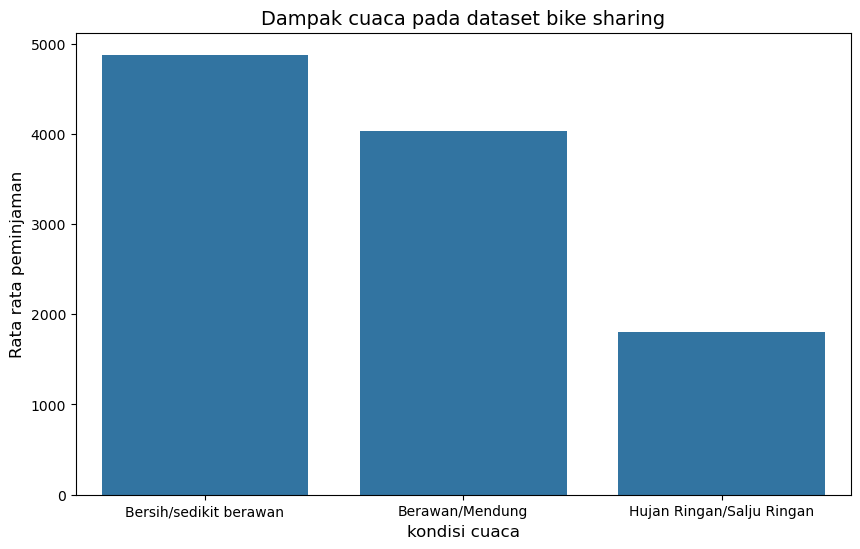

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group)
plt.title('Dampak cuaca pada dataset bike sharing', fontsize=14)
plt.xlabel('kondisi cuaca', fontsize=12)
plt.ylabel('Rata rata peminjaman', fontsize=12)
plt.show()

**Insight :**
- pada grafik ini Menunjukan bahwa **langit yang cerah dan sedikit berawan** banyak dipilih oleh pelanggan untuk menyewa sepeda, hal ini menunjukan kecenderungan pada **cuaca yang cerah** dan melihat kondisi **cuaca berawan dan mendung** cenderung masih diminati.
- Pada hujan ringan ataupun salju ringan masih memiliki peminatan terhadap penyewaan sepeda, berbeda dengan hujan lebat atau hujan salju lebat yang sama sekali tidak diminati. hal ini menjelaskan bahwa ketika **cuaca sedang tidak baik** akan **berdampak pula terhadap layanan bike sharing ini**

### Pertanyaan 2: Apakah terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur kerja?

Untuk menjawab pertanyaan ini pertama kita definisikan terlebih dahulu kategori weekday dan weekend nya

In [99]:
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

kemudian kelompokkan berdasarkan `day_type` (Hari kerja atau akhir pekan) dan hitung rata rata siswa

In [102]:
day_type_group = day_df.groupby('day_type')['cnt'].mean().reset_index()

Lalu Plotting perbedaan antara penyewa sepeda antara hari kerja dan hari libur

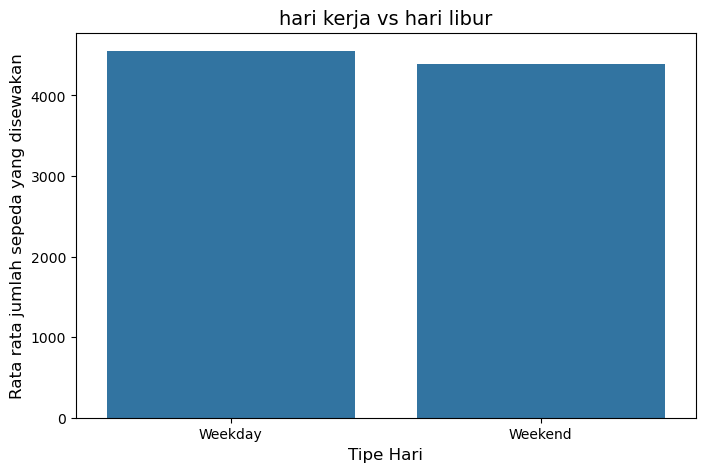

In [109]:
plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='cnt', data=day_type_group)
plt.title('hari kerja vs hari libur', fontsize=14)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata rata jumlah sepeda yang disewakan', fontsize=12)
plt.show()

**Insight :**
Perbedaan jumlah sepeda yang disewakan pada weekday dan weekend tidak jauh berbeda, dengan data yang sudah diperoleh sebelumnya maka bisa disimpulkan bahwa kemungkinan **banyaknya pesepeda di hari weekday(hari kerja)** karena **banyaknya orang yang menyewa sepeda pada saat jam jam berangkat kerja** dan **pulang kerja**. hal ini memberikan **pengaruh besar** pada perbandingan antara **hari kerja** dan **hari libur**.

### Pertanyaan 3: Bagaimana pengaruh kondisi suhu, kelembapan dan kecepatan angin terhadap jumlah penyewaan sepeda?

Sebelum itu kita akan mengekstrak terlebih dahulu kolom yang relevan dengan sumber data yaitu 
- suhu `temp`
- kelembapan `hum`
- jumlah persewaan `cnt`

hubungan antara suhu dan penyewaan sepeda

Text(0, 0.5, 'unit yang telah di rental')

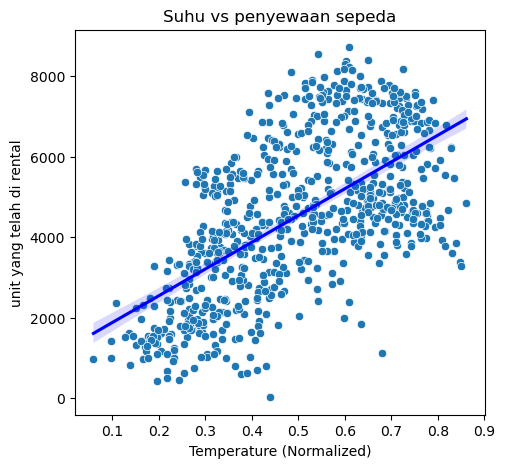

In [138]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=day_df)
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='blue')
plt.title('Suhu vs penyewaan sepeda')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('unit yang telah di rental')

hubungan antara kelembaban dan penyewaan sepeda

Text(0, 0.5, 'Unit yang di rental')

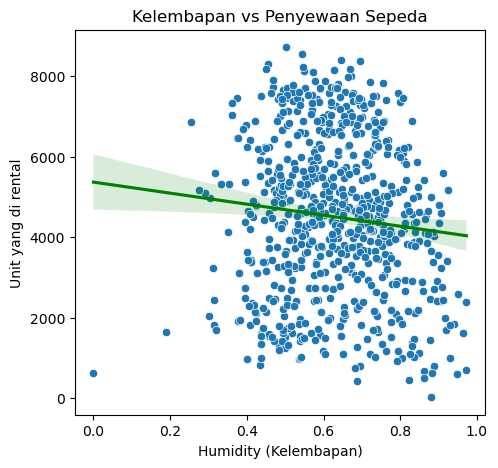

In [144]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=day_df)
sns.regplot(x='hum', y='cnt', data=day_df, scatter=False, color='green')
plt.title('Kelembapan vs Penyewaan Sepeda')
plt.xlabel('Humidity (Kelembapan)')
plt.ylabel('Unit yang di rental')

hubungan antara kecepatan angin dan penyewaan sepeda

Text(0, 0.5, 'Unit yang di rental')

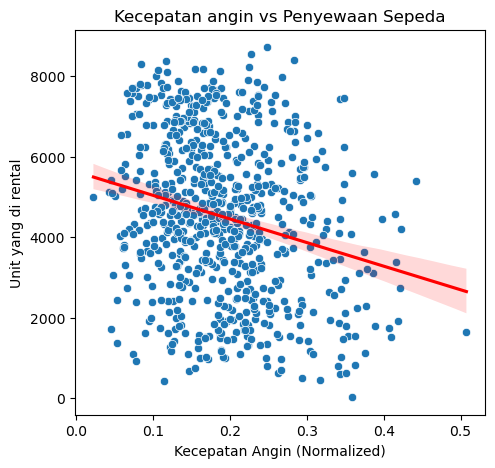

In [146]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter=False, color='red')
plt.title('Kecepatan angin vs Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Unit yang di rental')

**Insight:**
- pada hubungan antara suhu dan penyewaan sepeda memiliki pengaruh yang signifikan, orang orang cenderung menyukai **suhu yang hangat** pada saat penyewaan dibandingkan dengan **suhu yang dingin**
- pada hubungan kelembapan dengan penyewaan sepeda terlihat tidak memiliki pengaruh besar, pada garis lurus memperlihatkan bahwa orang orang cenderung menyewa sepeda di saat kelembapan udara berada di tengah tengah.
- pada hubungan kecepatan angin memperlihatkan bahwa beberapa orang yang menyewa sepeda memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda, banyak orang cenderung menyewa sepeda di sekitar kecepatan angin sepoi-sepoi

## Analisis Lanjutan (Clustering)

Buat aturan Pengelompokkan

Aturan Pengelompokkan suhu

In [166]:
def group_temp(temp):
    if temp < 0.3:
        return 'Suhu Rendah'
    elif 0.3 <= temp <= 0.7:
        return 'Suhu Menengah'
    else:
        return 'Suhu Hangat'

Aturan Pengelompokkan Kelembapan

In [169]:
def group_humidity(hum):
    if hum < 0.4:
        return 'Kering'
    elif 0.4 <= hum <= 0.7:
        return 'Menengah'
    else:
        return 'Sangat Lembap'

Aturan pengelompokkan kecepatan angin

In [172]:
def group_windspeed(windspeed):
    if windspeed < 0.2:
        return 'Angin Sepoi-Sepoi'
    elif 0.2 <= windspeed <= 0.5:
        return 'Angin sedang'
    else:
        return 'Angin Kencang'

Mengaplikasikan Fungsi

In [161]:
day_df['Temp Group'] = day_df['temp'].apply(group_temp)
day_df['Humidity Group'] = day_df['hum'].apply(group_humidity)
day_df['Windspeed Group'] = day_df['windspeed'].apply(group_windspeed)

implementasi

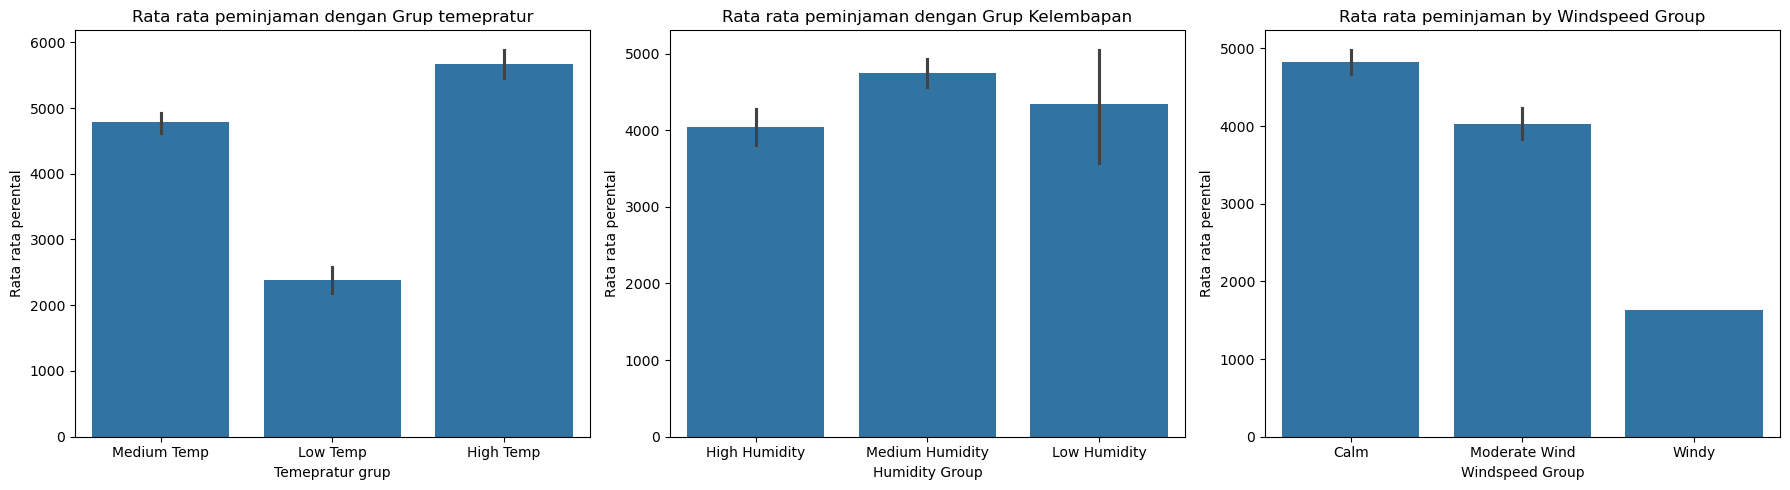

In [174]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Temp Group', y='cnt', data=day_df)
plt.title('Rata rata peminjaman dengan Grup temepratur')
plt.xlabel('Temepratur grup')
plt.ylabel('Rata rata perental')

plt.subplot(1, 3, 2)
sns.barplot(x='Humidity Group', y='cnt', data=day_df)
plt.title('Rata rata peminjaman dengan Grup Kelembapan')
plt.xlabel('Humidity Group')
plt.ylabel('Rata rata perental')

plt.subplot(1, 3, 3)
sns.barplot(x='Windspeed Group', y='cnt', data=day_df)
plt.title('Rata rata peminjaman by Windspeed Group')
plt.xlabel('Windspeed Group')
plt.ylabel('Rata rata perental')

plt.tight_layout()
plt.show()

**insight:**
dapat disimpulkan bahwa pada rata rata perental memiliki habitnya masing masing,
- peminjam cenderung menyukai **high temp** daripada **low temp**
- peminjam pada grup kelembapan tidak begitu memilih antara lembap dan kering,
- peminjam pada grup kecepatan angin memiliki kecenderungan untuk meminjam sepeda pada saat **angin calm** dibandung dengan **Angin Kencang**

## Conclusion

- Conclution pertanyaan 1 : pelanggan lebih memilih menyewa sepeda saat langit cerah dan sedikit berawan. Meskipun cuaca mendung dan berawan masih diminati, hujan ringan dan salju ringan tetap memiliki peminat. Namun, hujan lebat dan salju lebat tidak diminati sama sekali, menandakan bahwa kondisi cuaca buruk berdampak negatif pada layanan bike sharing.i
- Conclution pertanyaan 2 :Perbedaan jumlah sepeda yang disewakan pada weekday dan weekend tidak jauh berbeda, dengan data yang sudah diperoleh sebelumnya maka bisa disimpulkan bahwa kemungkinan banyaknya pesepeda di hari weekday(hari kerja) karena banyaknya orang yang menyewa sepeda pada saat jam jam berangkat kerja dan pulang kerja. hal ini memberikan sedikit pengaruh pada perbandingan antara hari kerja dan hari libur.
- Conclution pertanyaan 3 : Hubungan antara suhu dan penyewaan sepeda menunjukkan pengaruh signifikan, di mana orang lebih menyukai suhu hangat untuk menyewa sepeda dibandingkan suhu dingin. Sementara itu, kelembapan udara tidak memiliki pengaruh besar, dengan penyewaan paling banyak terjadi pada tingkat kelembapan sedang. Kecepatan angin memiliki pengaruh signifikan, dengan sedikitnya orang yang mau menyewa di saat cuaca berangin. 